## System Dynamics
The Given Differential equations

$\dot{X}$ = $f(x,y,z)$ 

$\dot{X} = \begin{pmatrix}
\dot{x} \\
\dot{y} \\
\dot{z}
\end{pmatrix}$ = $\begin{pmatrix} 
a \times (y-b) \\
bx-y-xz \\
xy-cz
\end{pmatrix}$

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
import math

In [2]:
# Gets the current position (x,y,z coordinates) and returns the new position
def motion_model(cur):
    a = 10
    b = 28
    c = 2.667
    dt = 0.0001
    x = float(cur[0][0])
    y = float(cur[1][0])
    z = float(cur[2][0])
    change = np.array([[dt * a * (y-b)],
                  [dt * ((b*x)-y-(x*z))],
                  [dt*(x*y-c*z)]])
    change = np.around(change, decimals=2)
    res = cur + change
    res = np.around(res, decimals=2)
    return res

In [3]:
%matplotlib widget

In [4]:
# Iterating thorugh small dt and storing the co-ordinates in an array
t = 0.0
dt = 0.0001
SIM_TIME = 2.0

# Initial State
X_dr = np.array([[0],[1],[1.05]])
x_curr = X_dr
while SIM_TIME >= t:
    x_next = motion_model(x_curr)
    X_dr = np.hstack((X_dr, x_next))
    x_curr = x_next
    t += dt

In [5]:
dataSet = np.array([X_dr[0][0:-2],X_dr[1][0:-2],X_dr[2][0:-2]])
numDataPoints = len(dataSet[0])

In [6]:
print('Trajectory Coordinates',dataSet)

Trajectory Coordinates [[ 0.000000e+00 -3.000000e-02 -6.000000e-02 ...  1.101880e+03
   1.188720e+03  1.275070e+03]
 [ 1.000000e+00  1.000000e+00  1.000000e+00 ...  8.686501e+04
   8.637336e+04  8.470605e+04]
 [ 1.050000e+00  1.050000e+00  1.050000e+00 ...  4.411130e+03
   1.398144e+04  2.424509e+04]]


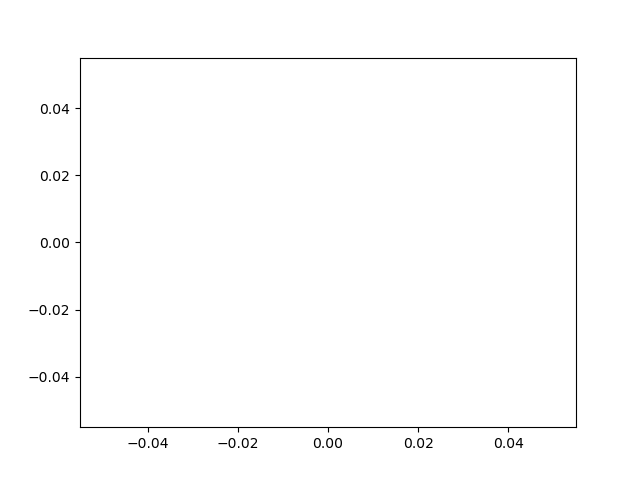

In [7]:
# Animating the trajectory in 2D
numFrames = 1000

fig, ax = plt.subplots()
dr_data, = plt.plot([],[],'-k', label='Trajectory')

frames=np.linspace(0, numFrames)
ind = [(int)(frame * X_dr.shape[1]/ numFrames) for frame in frames]

def init():
    x_dr = X_dr[0,:]
    y_dr = X_dr[1,:]
    ax.set_xlim([np.min(x_dr) - 5, np.max(x_dr) + 5])
    ax.set_ylim([np.min(y_dr) - 5, np.max(y_dr) + 5])
    plt.title("Trajectory of Bee")
    plt.legend()
    ax.grid(True)
    return dr_data,
    
def update(frameID):
    dr_data.set_data(X_dr[0,0:ind[frameID]], X_dr[1,0:ind[frameID]])
    return dr_data,

anim = FuncAnimation(fig, update, frames=numFrames, init_func=init, blit=True)
plt.show()